# Bài tập 3: Phân cụm đa cấp trên dữ liệu Penguins
Dataset: https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering

## 1. Import thư viện và load dữ liệu

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform

# Load dữ liệu
df = pd.read_csv('penguins.csv')
print("Thông tin dữ liệu:")
df.info()
print("\nMẫu dữ liệu:")
df.head()

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB

Mẫu dữ liệu:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## 2. Xử lý và chuẩn bị dữ liệu

In [5]:
# Loại bỏ các dòng có giá trị null
df_clean = df.dropna()
print(f"Số mẫu sau khi làm sạch: {len(df_clean)}")

# Chọn các đặc trưng số
features = ['culmen_depth_mm', 'flipper_length_mm', 'culmen_length_mm', 'body_mass_g']
X = df_clean[features].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape của dữ liệu: {X_scaled.shape}")
print("\nThống kê mô tả:")
print(df_clean[features].describe())

Số mẫu sau khi làm sạch: 335
Shape của dữ liệu: (335, 4)

Thống kê mô tả:
       culmen_depth_mm  flipper_length_mm  culmen_length_mm  body_mass_g
count       335.000000         335.000000        335.000000   335.000000
mean         17.169552         214.355224         43.988358  4209.179104
std           1.971966         263.253508          5.453430   803.633495
min          13.100000        -132.000000         32.100000  2700.000000
25%          15.600000         190.000000         39.500000  3550.000000
50%          17.300000         197.000000         44.500000  4050.000000
75%          18.700000         213.000000         48.550000  4787.500000
max          21.500000        5000.000000         59.600000  6300.000000


## 3. Tính ma trận khoảng cách (linkage matrix)

In [6]:
# Tính linkage matrix với phương pháp ward
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

print("Shape của linkage matrix:", linkage_matrix.shape)
print("\n5 dòng đầu của linkage matrix:")
print(linkage_matrix[:5])
print("\nGiải thích: Mỗi dòng [cluster1, cluster2, distance, num_samples]")

Shape của linkage matrix: (334, 4)

5 dòng đầu của linkage matrix:
[[6.80000000e+01 1.55000000e+02 3.75088322e-02 2.00000000e+00]
 [4.30000000e+01 1.43000000e+02 5.42319381e-02 2.00000000e+00]
 [8.20000000e+01 1.27000000e+02 5.61079681e-02 2.00000000e+00]
 [2.91000000e+02 2.97000000e+02 5.62632484e-02 2.00000000e+00]
 [2.05000000e+02 2.14000000e+02 6.14938848e-02 2.00000000e+00]]

Giải thích: Mỗi dòng [cluster1, cluster2, distance, num_samples]


## 4. Vẽ Dendrogram

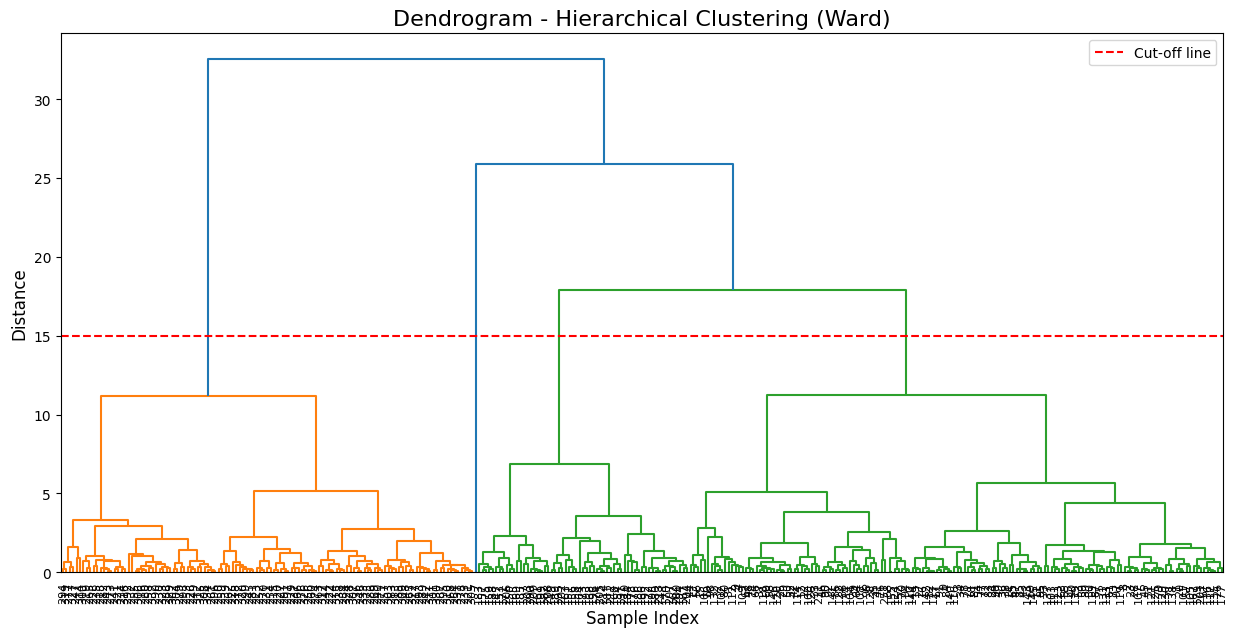

In [7]:
# Vẽ dendrogram đầy đủ
plt.figure(figsize=(15, 7))
plt.title('Dendrogram - Hierarchical Clustering (Ward)', fontsize=16)
dendrogram(
    linkage_matrix,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=15, color='r', linestyle='--', label='Cut-off line')
plt.legend()
plt.show()

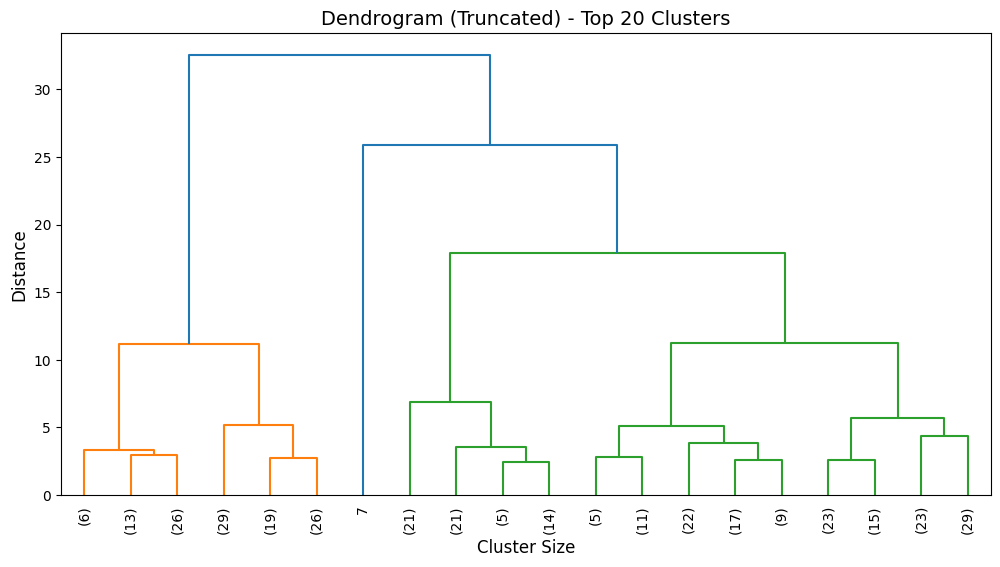

In [8]:
# Vẽ dendrogram rút gọn (truncated)
plt.figure(figsize=(12, 6))
plt.title('Dendrogram (Truncated) - Top 20 Clusters', fontsize=14)
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=20,
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

## 5. So sánh các phương pháp linkage

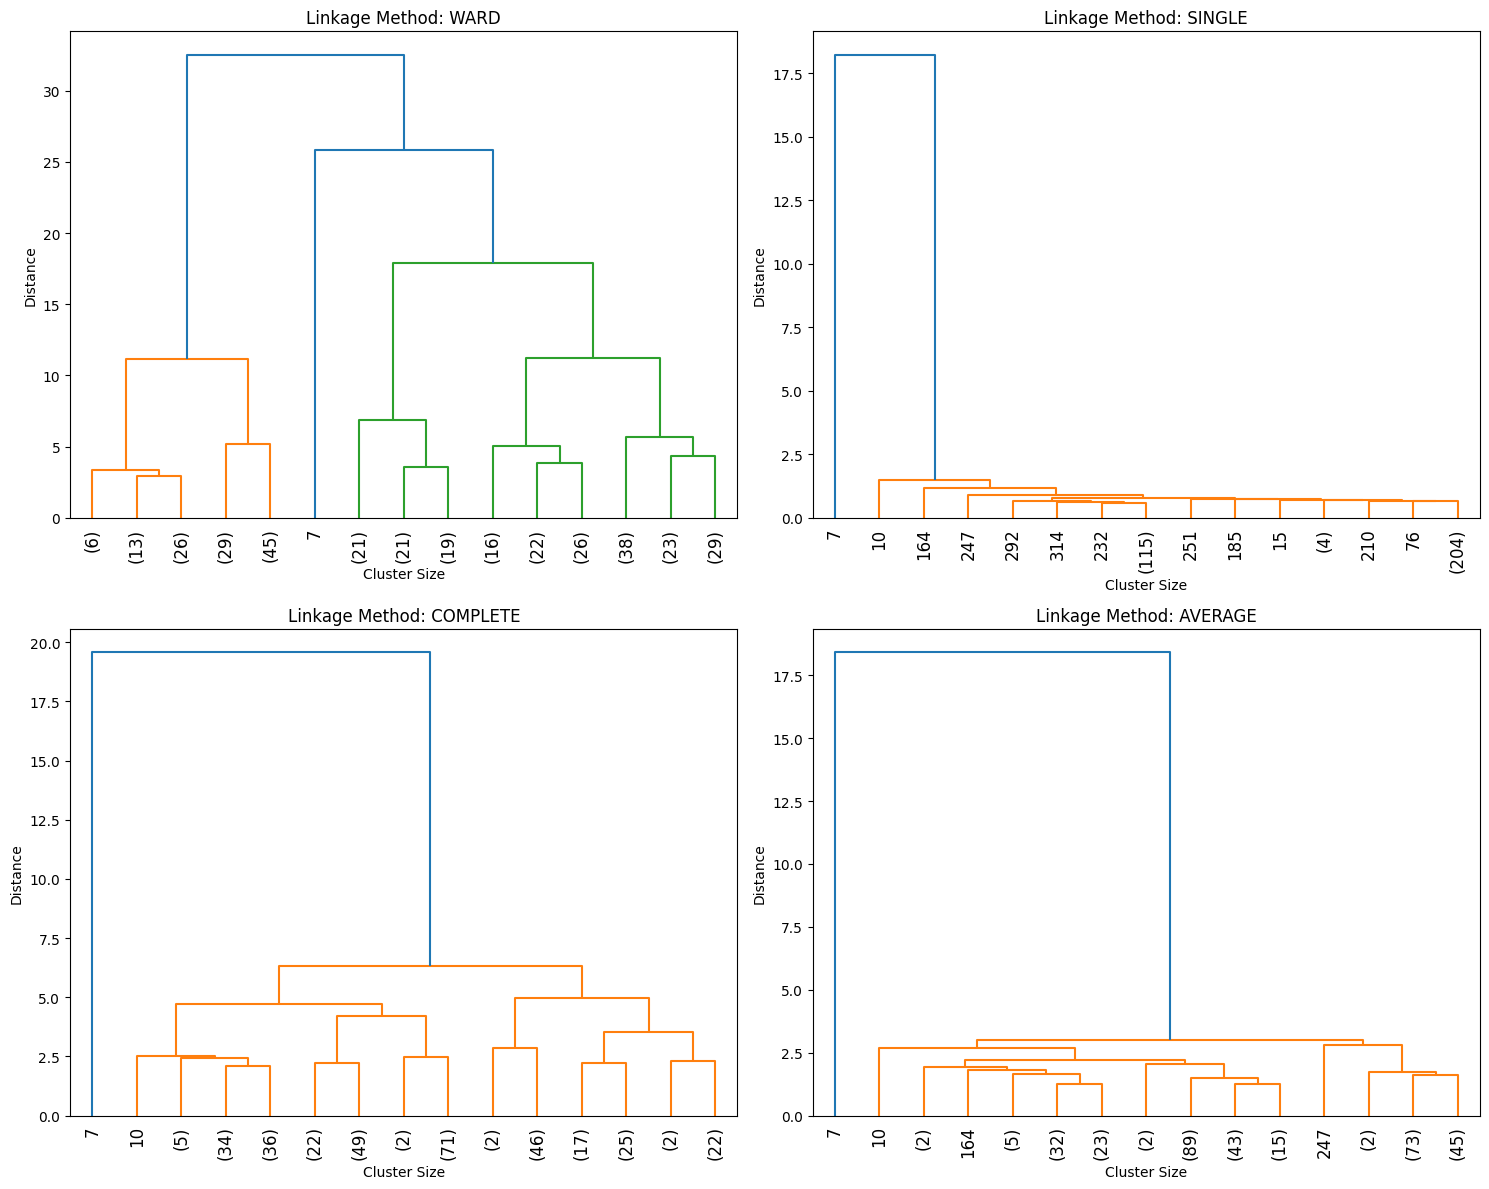

In [9]:
# Các phương pháp linkage khác nhau
methods = ['ward', 'single', 'complete', 'average']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, method in enumerate(methods):
    linkage_mat = linkage(X_scaled, method=method, metric='euclidean')
    
    dendrogram(
        linkage_mat,
        ax=axes[idx],
        truncate_mode='lastp',
        p=15,
        show_leaf_counts=True,
        leaf_rotation=90
    )
    axes[idx].set_title(f'Linkage Method: {method.upper()}', fontsize=12)
    axes[idx].set_xlabel('Cluster Size')
    axes[idx].set_ylabel('Distance')

plt.tight_layout()
plt.show()

## 6. Xác định số cụm tối ưu bằng Silhouette Score

K=2, Silhouette Score=0.4815
K=3, Silhouette Score=0.4950
K=4, Silhouette Score=0.4685
K=5, Silhouette Score=0.4194
K=6, Silhouette Score=0.3855
K=7, Silhouette Score=0.3713
K=8, Silhouette Score=0.3329
K=9, Silhouette Score=0.2913
K=10, Silhouette Score=0.3044


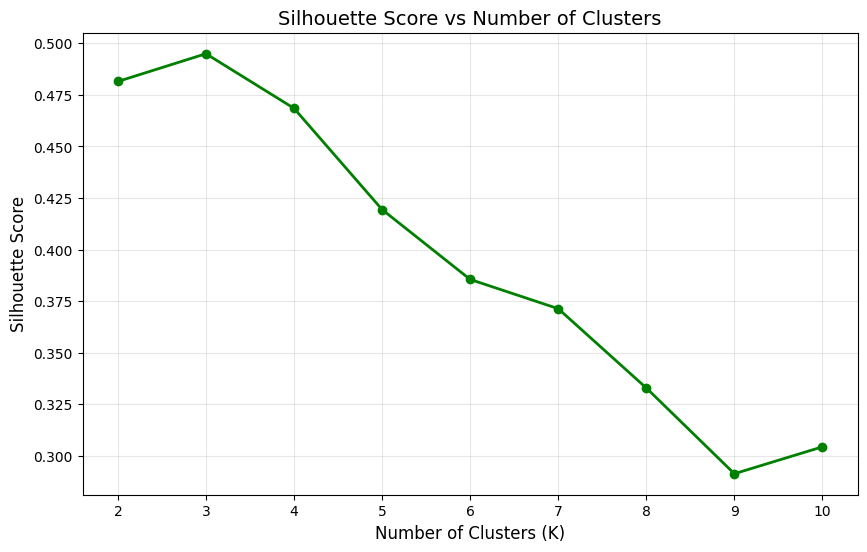


Số cụm tối ưu: K = 3


In [10]:
# Thử các số cụm khác nhau
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', linewidth=2, color='green')
plt.title('Silhouette Score vs Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nSố cụm tối ưu: K = {optimal_k}")

## 7. Xây dựng mô hình với Scikit-learn

In [11]:
# Sử dụng AgglomerativeClustering từ scikit-learn
optimal_k = 3
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
sklearn_clusters = agg_clustering.fit_predict(X_scaled)

# Gán nhãn cụm vào dataframe
df_clean['Cluster_Sklearn'] = sklearn_clusters

print(f"Silhouette Score (Sklearn): {silhouette_score(X_scaled, sklearn_clusters):.4f}")
print(f"\nPhân bố các cụm:")
print(df_clean['Cluster_Sklearn'].value_counts().sort_index())

Silhouette Score (Sklearn): 0.4950

Phân bố các cụm:
Cluster_Sklearn
0    215
1    119
2      1
Name: count, dtype: int64


## 8. Xây dựng mô hình với SciPy

In [12]:
# Sử dụng fcluster từ SciPy
scipy_clusters = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Chuyển về index từ 0 (thay vì 1)
scipy_clusters = scipy_clusters - 1
df_clean['Cluster_Scipy'] = scipy_clusters

print(f"Silhouette Score (Scipy): {silhouette_score(X_scaled, scipy_clusters):.4f}")
print(f"\nPhân bố các cụm:")
print(df_clean['Cluster_Scipy'].value_counts().sort_index())

Silhouette Score (Scipy): 0.4950

Phân bố các cụm:
Cluster_Scipy
0    119
1    215
2      1
Name: count, dtype: int64


## 9. So sánh kết quả giữa Sklearn và Scipy

In [13]:
# Kiểm tra xem 2 phương pháp có cho kết quả giống nhau không
comparison = (df_clean['Cluster_Sklearn'] == df_clean['Cluster_Scipy']).sum()
total = len(df_clean)
print(f"Số mẫu có cùng nhãn cụm: {comparison}/{total} ({comparison/total*100:.2f}%)")

# Crosstab
print("\nBảng so sánh:")
print(pd.crosstab(df_clean['Cluster_Sklearn'], df_clean['Cluster_Scipy'], 
                   rownames=['Sklearn'], colnames=['Scipy']))

Số mẫu có cùng nhãn cụm: 1/335 (0.30%)

Bảng so sánh:
Scipy      0    1  2
Sklearn             
0          0  215  0
1        119    0  0
2          0    0  1


## 10. Trực quan hóa kết quả phân cụm

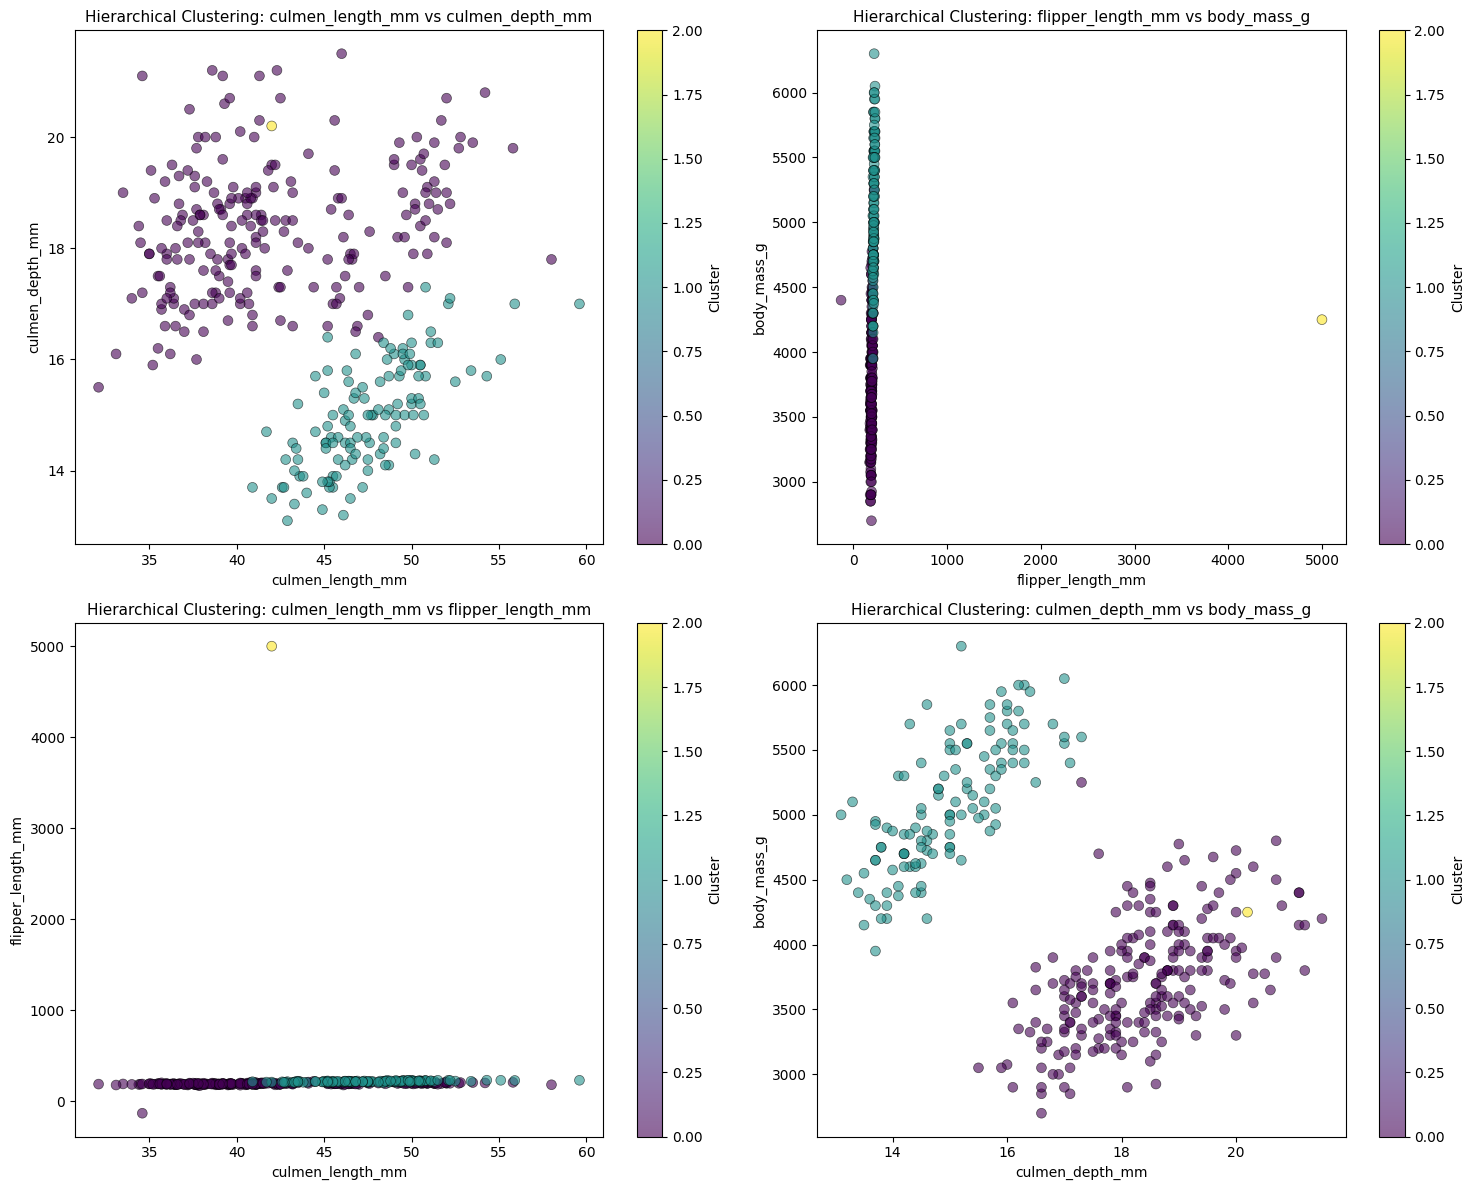

In [15]:
# Visualize với các cặp features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
feature_pairs = [
    ('culmen_length_mm', 'culmen_depth_mm'),
    ('flipper_length_mm', 'body_mass_g'),
    ('culmen_length_mm', 'flipper_length_mm'),
    ('culmen_depth_mm', 'body_mass_g')
]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx // 2, idx % 2]
    scatter = ax.scatter(
        df_clean[feat1], 
        df_clean[feat2], 
        c=df_clean['Cluster_Sklearn'],
        cmap='viridis', 
        s=50, 
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )
    ax.set_xlabel(feat1, fontsize=10)
    ax.set_ylabel(feat2, fontsize=10)
    ax.set_title(f'Hierarchical Clustering: {feat1} vs {feat2}', fontsize=11)
    plt.colorbar(scatter, ax=ax, label='Cluster')

plt.tight_layout()
plt.show()

## 11. Phân tích đặc điểm các cụm

In [16]:
# Thống kê đặc điểm của từng cụm
for cluster_id in range(optimal_k):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*60}")
    cluster_data = df_clean[df_clean['Cluster_Sklearn'] == cluster_id][features]
    print(cluster_data.describe())
    
    # Nếu có cột species
    if 'species' in df_clean.columns:
        print(f"\nPhân bố loài trong Cluster {cluster_id}:")
        print(df_clean[df_clean['Cluster_Sklearn'] == cluster_id]['species'].value_counts())


CLUSTER 0
       culmen_depth_mm  flipper_length_mm  culmen_length_mm  body_mass_g
count       215.000000         215.000000        215.000000   215.000000
mean         18.365581         190.511628         42.015814  3721.860465
std           1.190589          23.310954          5.481134   447.081689
min          15.500000        -132.000000         32.100000  2700.000000
25%          17.500000         187.000000         37.800000  3400.000000
50%          18.400000         191.000000         40.600000  3700.000000
75%          19.100000         196.000000         46.000000  4000.000000
max          21.500000         219.000000         58.000000  5250.000000

CLUSTER 1
       culmen_depth_mm  flipper_length_mm  culmen_length_mm  body_mass_g
count       119.000000         119.000000        119.000000   119.000000
mean         14.983193         217.218487         47.568908  5089.285714
std           0.965008           6.583441          3.105265   501.655854
min          13.100000       

## 12. So sánh với nhãn thực tế (nếu có)

In [17]:
if 'species' in df_clean.columns:
    # Crosstab giữa cluster và species
    comparison_table = pd.crosstab(
        df_clean['Cluster_Sklearn'], 
        df_clean['species'],
        rownames=['Cluster'],
        colnames=['Species']
    )
    print("\nBảng so sánh Cluster vs Species:")
    print(comparison_table)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Stacked bar chart
    comparison_table.plot(kind='bar', stacked=False, ax=axes[0], colormap='Set2')
    axes[0].set_title('Phân bố Species trong các Cluster', fontsize=12)
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel('Số lượng')
    axes[0].legend(title='Species')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
    
    # Heatmap
    sns.heatmap(comparison_table, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1])
    axes[1].set_title('Heatmap: Cluster vs Species', fontsize=12)
    
    plt.tight_layout()
    plt.show()

## 13. So sánh Hierarchical Clustering với K-Means

So sánh Silhouette Score:
Hierarchical Clustering: 0.4950
K-Means Clustering: 0.4963


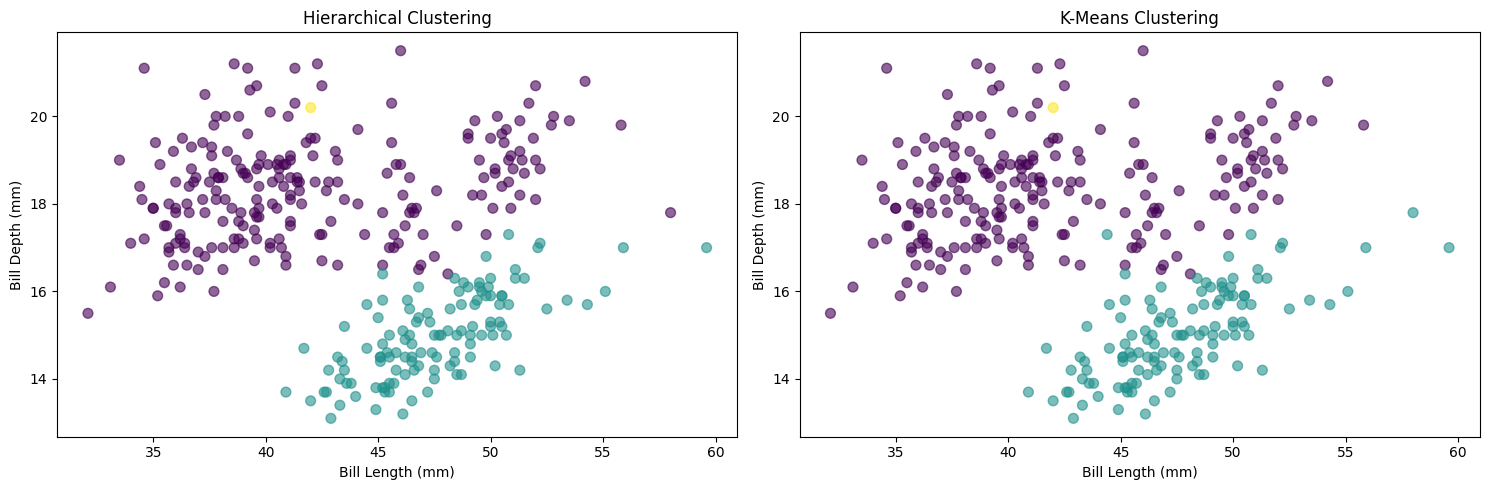

In [19]:
from sklearn.cluster import KMeans

# K-Means với cùng số cụm
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)
df_clean['Cluster_KMeans'] = kmeans_clusters

# So sánh Silhouette Score
print("So sánh Silhouette Score:")
print(f"Hierarchical Clustering: {silhouette_score(X_scaled, sklearn_clusters):.4f}")
print(f"K-Means Clustering: {silhouette_score(X_scaled, kmeans_clusters):.4f}")

# Visualize so sánh
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hierarchical
axes[0].scatter(df_clean['culmen_length_mm'], df_clean['culmen_depth_mm'], 
                c=df_clean['Cluster_Sklearn'], cmap='viridis', s=50, alpha=0.6)
axes[0].set_title('Hierarchical Clustering', fontsize=12)
axes[0].set_xlabel('Bill Length (mm)')
axes[0].set_ylabel('Bill Depth (mm)')

# K-Means
axes[1].scatter(df_clean['culmen_length_mm'], df_clean['culmen_depth_mm'], 
                c=df_clean['Cluster_KMeans'], cmap='viridis', s=50, alpha=0.6)
axes[1].set_title('K-Means Clustering', fontsize=12)
axes[1].set_xlabel('Bill Length (mm)')
axes[1].set_ylabel('Bill Depth (mm)')

plt.tight_layout()
plt.show()